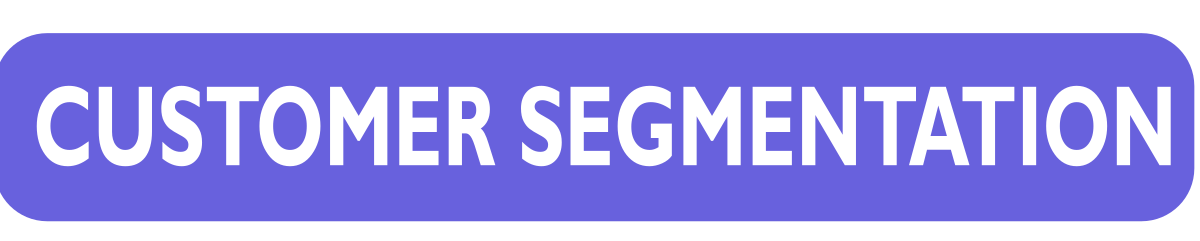

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

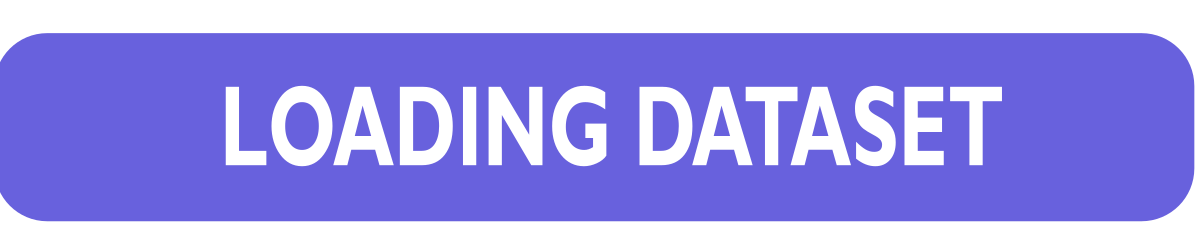

In [2]:
## Mengambil dataset dalam bentuk csv
df = pd.read_csv('marketing_campaign.csv',sep ='\t')
number_of_point = len(df)
print('Dataset memiliki:', number_of_point, 'data point')

Dataset memiliki: 2240 data point


In [3]:
## Menampilkan 5 data pertama
print('5 Data pertama pada dataset: ')
df.head(5)

5 Data pertama pada dataset: 


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
## Menampilkan columns dataset
print('Columns pada dataset: ')
df.columns

Columns pada dataset: 


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Ringkasan:

Attributes

**People**

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

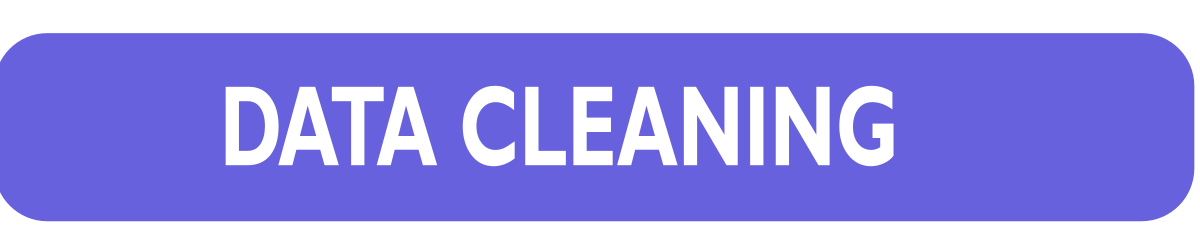

In [5]:
## Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

There are two problems with this data:

* **Missing values** in the **income** feature.
* The data type for the **Dt_Customer** (Customer Date) feature is incorrect.

In [6]:
## Menghapus nilai yang hilang
df.dropna(inplace=True)

In [7]:
## total number after removing th data
print('Total data point setelah dihapus:', len(df))

Total data point setelah dihapus: 2216


Setelah ini, saya akan menyelesaikan tipe data yang tidak sesuai pada feature dt_customer menjadi format yang sesuai.

In [8]:
## Mengubah format dari object menjadi datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='mixed', dayfirst=True)

In [9]:
dt_data = []
for data in df['Dt_Customer']:
  data = data.date()
  dt_data.append(data)

## Melihat tanggal pelanggan paling lama dan paling baru
print('Pelanggan paling lama:', min(dt_data))
print('Pelanggan paling baru:', max(dt_data))


Pelanggan paling lama: 2012-07-30
Pelanggan paling baru: 2014-06-29


In [10]:
#Created a feature "Customer_For"
days = []
d1 = max(df['Dt_Customer']) #taking it to be the newest customer
for i in df['Dt_Customer']:
    delta = d1 - i
    days.append(delta.days) # Extract the number of days from the timedelta object
df["Customer_For"] = days

In [11]:
df.Customer_For

,Customer_For
0,663
1,113
2,312
3,139
4,161
...,...
2235,381
2236,19
2237,155
2238,156


In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,161


In [13]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_For'],
      dtype='object')

In [14]:
## Melihat isi data dari fitur Education
df['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [15]:
## melihat isi data fitur MaritalStatus
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


Mengganti kolom year birth dengan fitur age

In [16]:
## Mengganti year birth dengan age
df['Age'] = 2025 - df['Year_Birth']

## Menghapus Fitur year Birth
df.drop('Year_Birth', axis=1, inplace= True)

In [17]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,3,11,1,663,68
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,3,11,0,113,71
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,3,11,0,312,60
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,3,11,0,139,41
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,3,11,0,161,44


Setelah itu, saya akan membuat fitur baru untuk menyimpan nilai spent setiap pelanggan pada berbagai products

In [18]:
## Membuat fitur spent untuk menyimpan jumlah dari penjualan products
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


In [19]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,3,11,1,663,68,1617
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,3,11,0,113,71,27
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,3,11,0,312,60,776
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,3,11,0,139,41,53
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,3,11,0,161,44,422


Setelah itu mengatur nilai nilai pada marital status dan mengganti namanya menjadi Living_-with

In [20]:
## membuat fitur baru dari maritalstatus dan mengubah nilainya agar makin efisien
df['living_with'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})
df.drop('Marital_Status', inplace=True , axis=1)

In [21]:
df.head()

,ID,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,living_with
0,5524,Graduation,58138.0,0,0,2012-09-04,58,635,88,546,...,0,0,0,3,11,1,663,68,1617,Alone
1,2174,Graduation,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0,0,3,11,0,113,71,27,Alone
2,4141,Graduation,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,3,11,0,312,60,776,Partner
3,6182,Graduation,26646.0,1,0,2014-02-10,26,11,4,20,...,0,0,0,3,11,0,139,41,53,Partner
4,5324,PhD,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,3,11,0,161,44,422,Partner


selanjutnya, saya akan membuat fitur baru untuk jumlah keluarga dengan mengkombinasikan fitur kiddhome, teen home dan living with

In [22]:
## Membuat fitur family_size dengan mengambil fitur kid teen dan living with
df['children'] = df['Kidhome'] + df['Teenhome']
df['family_size'] = df['children'] + df['living_with'].replace({'Partner':2, 'Alone':1})
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

/tmp/ipython-input-2482816722.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['family_size'] = df['children'] + df['living_with'].replace({'Partner':2, 'Alone':1})


In [23]:
df.head()

,ID,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,living_with,children,family_size
0,5524,Graduation,58138.0,2012-09-04,58,635,88,546,172,88,...,0,3,11,1,663,68,1617,Alone,0,1
1,2174,Graduation,46344.0,2014-03-08,38,11,1,6,2,1,...,0,3,11,0,113,71,27,Alone,2,3
2,4141,Graduation,71613.0,2013-08-21,26,426,49,127,111,21,...,0,3,11,0,312,60,776,Partner,0,2
3,6182,Graduation,26646.0,2014-02-10,26,11,4,20,10,3,...,0,3,11,0,139,41,53,Partner,1,3
4,5324,PhD,58293.0,2014-01-19,94,173,43,118,46,27,...,0,3,11,0,161,44,422,Partner,1,3


aku akan membuat fitur yang menyatakan bahwa si pengguna adalah seoarang orang tua

In [24]:
df["Is_Parent"] = np.where(df.children> 0, 1, 0)

In [25]:
df.head()

,ID,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,living_with,children,family_size,Is_Parent
0,5524,Graduation,58138.0,2012-09-04,58,635,88,546,172,88,...,3,11,1,663,68,1617,Alone,0,1,0
1,2174,Graduation,46344.0,2014-03-08,38,11,1,6,2,1,...,3,11,0,113,71,27,Alone,2,3,1
2,4141,Graduation,71613.0,2013-08-21,26,426,49,127,111,21,...,3,11,0,312,60,776,Partner,0,2,0
3,6182,Graduation,26646.0,2014-02-10,26,11,4,20,10,3,...,3,11,0,139,41,53,Partner,1,3,1
4,5324,PhD,58293.0,2014-01-19,94,173,43,118,46,27,...,3,11,0,161,44,422,Partner,1,3,1


In [26]:
#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [27]:
df.head()

,ID,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,living_with,children,family_size,Is_Parent
0,5524,Graduate,58138.0,2012-09-04,58,635,88,546,172,88,...,3,11,1,663,68,1617,Alone,0,1,0
1,2174,Graduate,46344.0,2014-03-08,38,11,1,6,2,1,...,3,11,0,113,71,27,Alone,2,3,1
2,4141,Graduate,71613.0,2013-08-21,26,426,49,127,111,21,...,3,11,0,312,60,776,Partner,0,2,0
3,6182,Graduate,26646.0,2014-02-10,26,11,4,20,10,3,...,3,11,0,139,41,53,Partner,1,3,1
4,5324,Postgraduate,58293.0,2014-01-19,94,173,43,118,46,27,...,3,11,0,161,44,422,Partner,1,3,1


Setelah ini, saya akan mengubah nama fitur pada penjualan product. Ini menghasilkan sebuah clarity yang sangat mudah dipahami.

In [28]:

#For clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [29]:
df.head()

,ID,Education,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,living_with,children,family_size,Is_Parent
0,5524,Graduate,58138.0,2012-09-04,58,635,88,546,172,88,...,3,11,1,663,68,1617,Alone,0,1,0
1,2174,Graduate,46344.0,2014-03-08,38,11,1,6,2,1,...,3,11,0,113,71,27,Alone,2,3,1
2,4141,Graduate,71613.0,2013-08-21,26,426,49,127,111,21,...,3,11,0,312,60,776,Partner,0,2,0
3,6182,Graduate,26646.0,2014-02-10,26,11,4,20,10,3,...,3,11,0,139,41,53,Partner,1,3,1
4,5324,Postgraduate,58293.0,2014-01-19,94,173,43,118,46,27,...,3,11,0,161,44,422,Partner,1,3,1


Lalu saya akan menghapus fitur fitur yang tidak akan digunakan

In [30]:
ftr_tdk_terpakai = ['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']
df.drop(ftr_tdk_terpakai, axis=1, inplace=True)

In [31]:
df.head()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,living_with,children,family_size,Is_Parent
0,Graduate,58138.0,58,635,88,546,172,88,88,3,...,0,0,1,663,68,1617,Alone,0,1,0
1,Graduate,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,113,71,27,Alone,2,3,1
2,Graduate,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,312,60,776,Partner,0,2,0
3,Graduate,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,139,41,53,Partner,1,3,1
4,Postgraduate,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,161,44,422,Partner,1,3,1


In [32]:
df.describe()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,children,family_size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,...,0.064079,0.013538,0.009477,0.150271,353.521209,56.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,...,0.244950,0.115588,0.096907,0.357417,202.434667,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,48.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,355.500000,55.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,529.000000,66.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,...,1.000000,1.000000,1.000000,1.000000,699.000000,132.000000,2525.000000,3.000000,5.000000,1.000000


<Figure size 800x550 with 0 Axes>

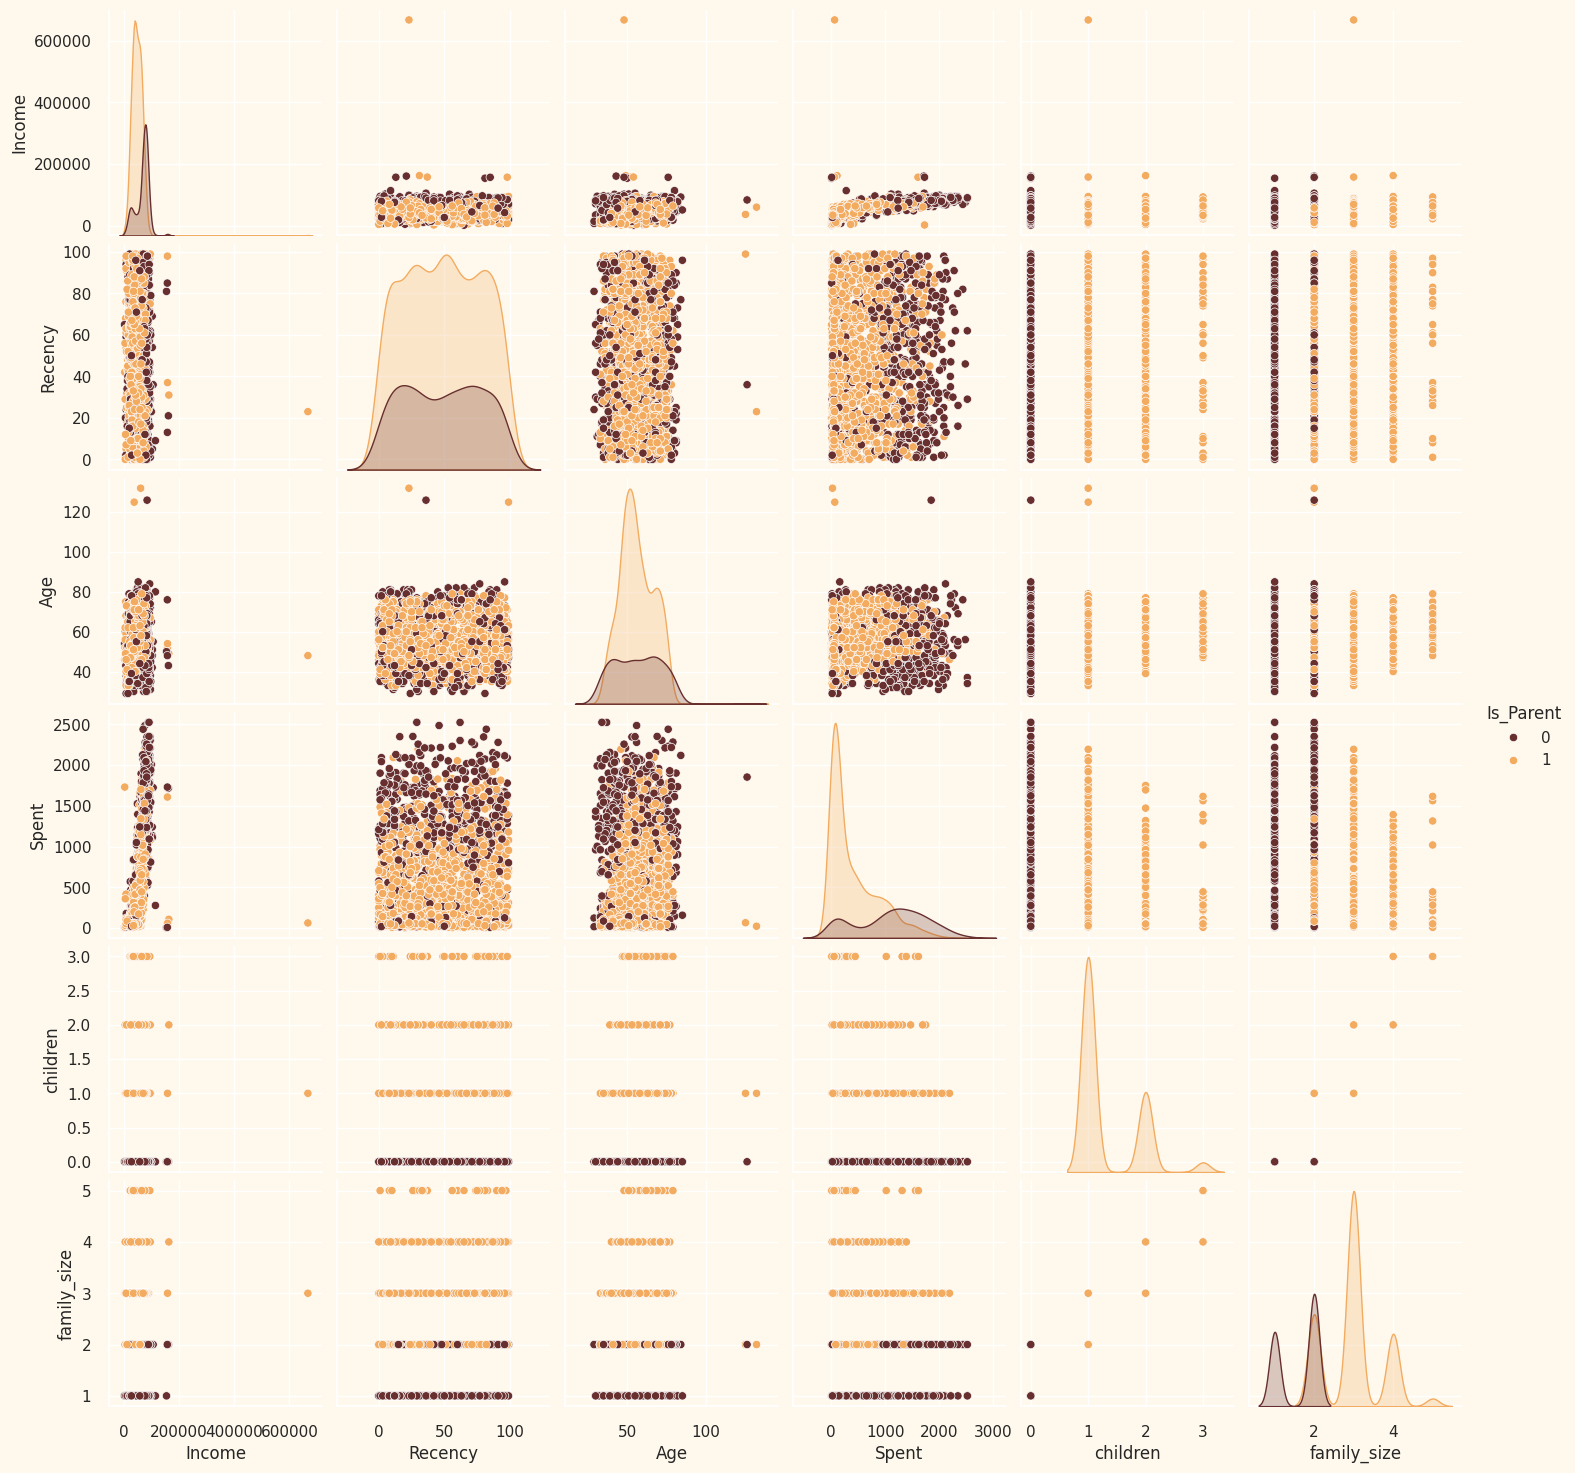

In [33]:
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

To_plot = ['Income', 'Recency', 'Age', 'Spent', 'children', 'family_size', 'Is_Parent']
plt.figure()
sns.pairplot(df[To_plot], hue='Is_Parent' , palette=(["#682F2F","#F3AB60"]))
plt.show()

In [34]:
#Dropping the outliers by setting a cap on Age and income.
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2212


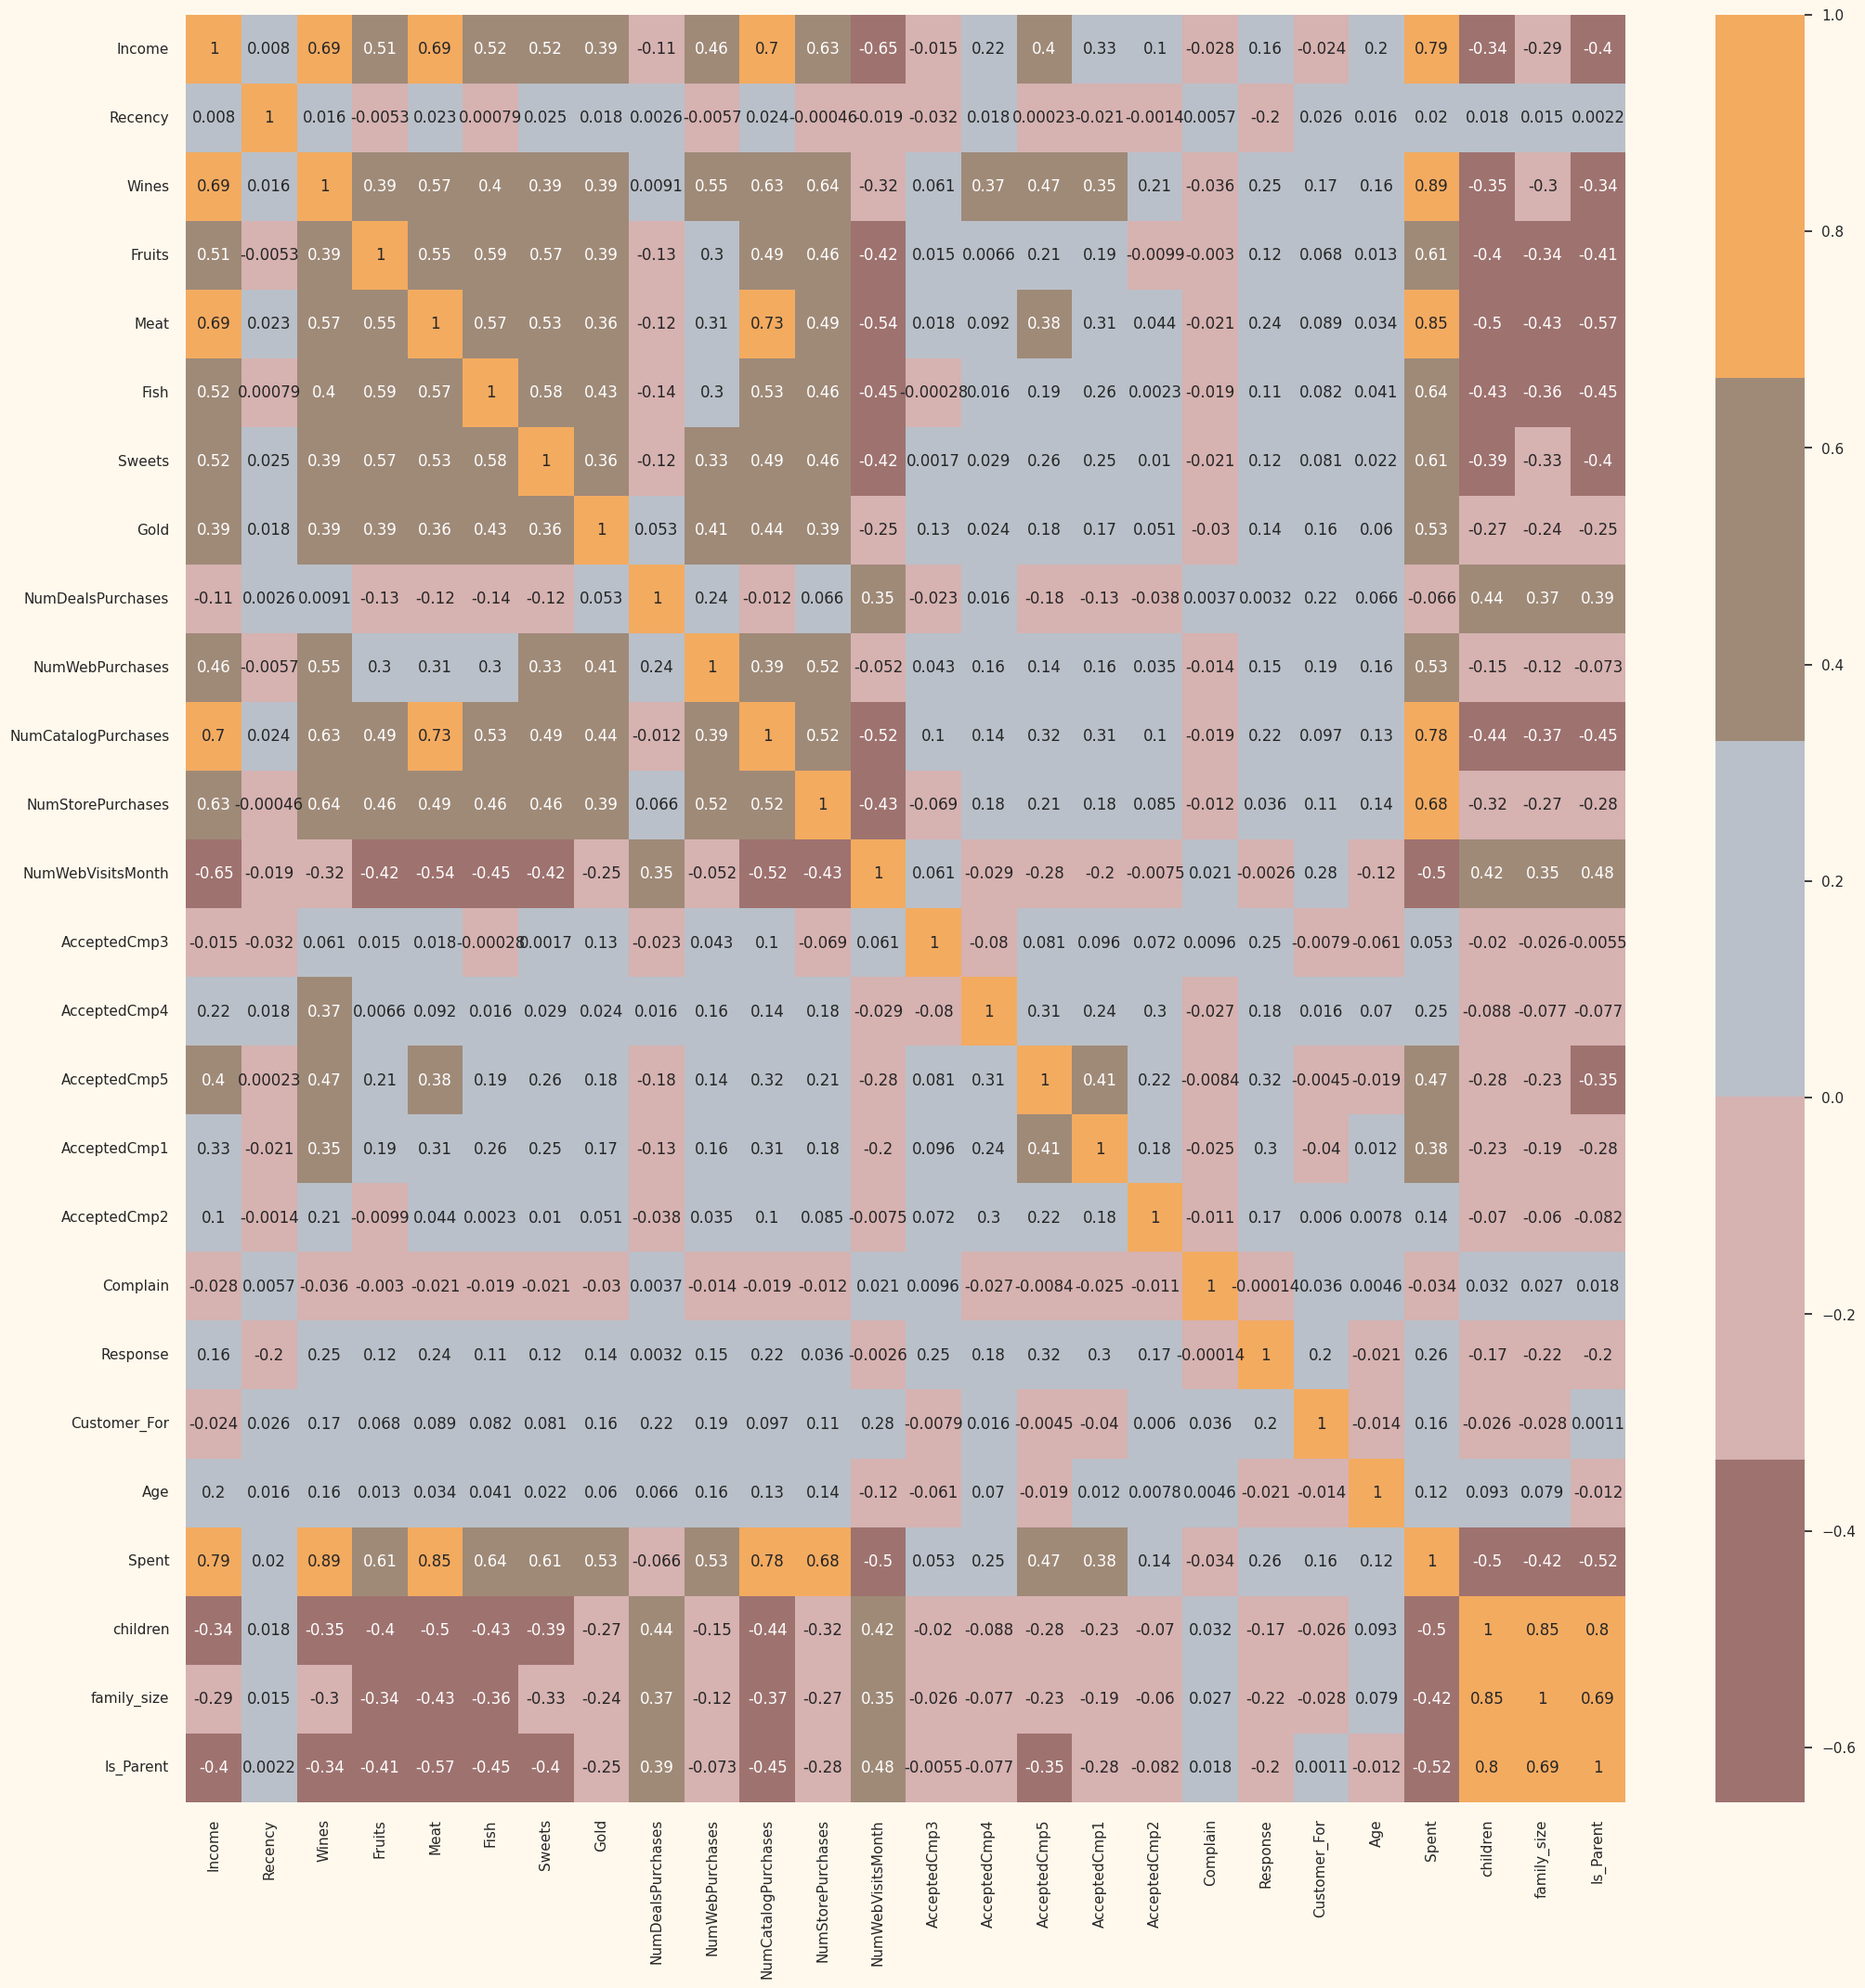

In [35]:
#correlation matrix
numerical_df = df.select_dtypes(include=np.number)
corrmat = numerical_df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)
plt.show()

wah, dari korelasi yang ditampilkan sangat bisa membuka wawasan pada dataset ini.

In [36]:
df.head()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,living_with,children,family_size,Is_Parent
0,Graduate,58138.0,58,635,88,546,172,88,88,3,...,0,0,1,663,68,1617,Alone,0,1,0
1,Graduate,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,113,71,27,Alone,2,3,1
2,Graduate,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,312,60,776,Partner,0,2,0
3,Graduate,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,139,41,53,Partner,1,3,1
4,Postgraduate,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,161,44,422,Partner,1,3,1


In [37]:
## menentukann numerikal dan kategorikal fitur
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Numerical columns pada dataaset : ", list(num_features))
print('Jumlah numerical feature pada dataset:', len(num_features))
print('                   ')

cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("Categorical columns pada dataaset : ", list(cat_features))
print('Jumlah numerical feature pada dataset:', len(cat_features))
print('                   ')

Numerical columns pada dataaset :  ['Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For', 'Age', 'Spent', 'children', 'family_size', 'Is_Parent']
Jumlah numerical feature pada dataset: 26
                   
Categorical columns pada dataaset :  ['Education', 'living_with']
Jumlah numerical feature pada dataset: 2
                   


## DATA PREPROCESSING

In [38]:
#Creating a copy of data
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

In [41]:
X_train = ds

In [42]:
# Redefine numerical and categorical features based on X_train after dropping columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_features = [feature for feature in X_train.columns if X_train[feature].dtypes != 'O']
cat_features = [feature for feature in X_train.columns if X_train[feature].dtypes == 'O']


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)



In [43]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['Education', 'living_with']),
                                ('StandardScaler', StandardScaler(),
                                 ['Income', 'Recency', 'Wines', 'Fruits',
                                  'Meat', 'Fish', 'Sweets', 'Gold',
                                  'NumDealsPurchases', 'NumWebPurchases',
                                  'NumCatalogPurchases', 'NumStorePurchases',
                                  'NumWebVisitsMonth', 'AcceptedCmp3',
                                  'AcceptedCmp4', 'AcceptedCmp5',
                                  'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
                                  'Response', 'Customer_For', 'Age', 'Spent',
                                  'children', 'family_size', 'Is_Parent'])])

In [44]:
X_train = preprocessor.fit_transform(X_train)


In [45]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,0.0,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,-0.261914,-0.117256,-0.09552,2.375425,1.527721,1.018352,1.676245,-1.264598,-1.758359,-1.581139
1,0.0,0.0,0.0,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.261914,-0.117256,-0.09552,-0.420977,-1.189011,1.274785,-0.963297,1.404572,0.449070,0.632456
2,0.0,0.0,1.0,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.261914,-0.117256,-0.09552,-0.420977,-0.206048,0.334530,0.280110,-1.264598,-0.654644,-1.581139
3,0.0,0.0,1.0,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.261914,-0.117256,-0.09552,-0.420977,-1.060584,-1.289547,-0.920135,0.069987,0.449070,0.632456
4,1.0,0.0,1.0,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,-0.261914,-0.117256,-0.09552,-0.420977,-0.951915,-1.033114,-0.307562,0.069987,0.449070,0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.0,0.0,1.0,0.430444,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,...,-0.261914,-0.117256,-0.09552,-0.420977,0.134778,0.163575,1.218061,0.069987,0.449070,0.632456
2208,1.0,0.0,1.0,0.560123,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,...,3.818045,-0.117256,-0.09552,-0.420977,-1.653326,1.958607,-0.271040,2.739158,2.656499,0.632456
2209,0.0,0.0,0.0,0.233347,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,...,-0.261914,-0.117256,-0.09552,-0.420977,-0.981552,-1.033114,1.052052,-1.264598,-1.758359,-1.581139
2210,1.0,0.0,1.0,0.803172,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,...,-0.261914,-0.117256,-0.09552,-0.420977,-0.976612,1.103830,0.391336,0.069987,0.449070,0.632456


In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

Steps in this section:

Dimensionality reduction with PCA
Plotting the reduced dataframe
Dimensionality reduction with PCA

For this project, I will be reducing the dimensions to 3.

In [56]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(X_train)
PCA_ds = pd.DataFrame(pca.transform(X_train), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-3.790418e-16,2.868059,-5.681125,-2.490446,-0.964853,2.216045,8.584927
col2,2212.0,2.955241e-16,1.550159,-3.887376,-1.104154,-0.176019,1.024091,5.850049
col3,2212.0,7.950241e-17,1.375466,-3.114228,-0.713747,-0.105887,0.362866,8.777946


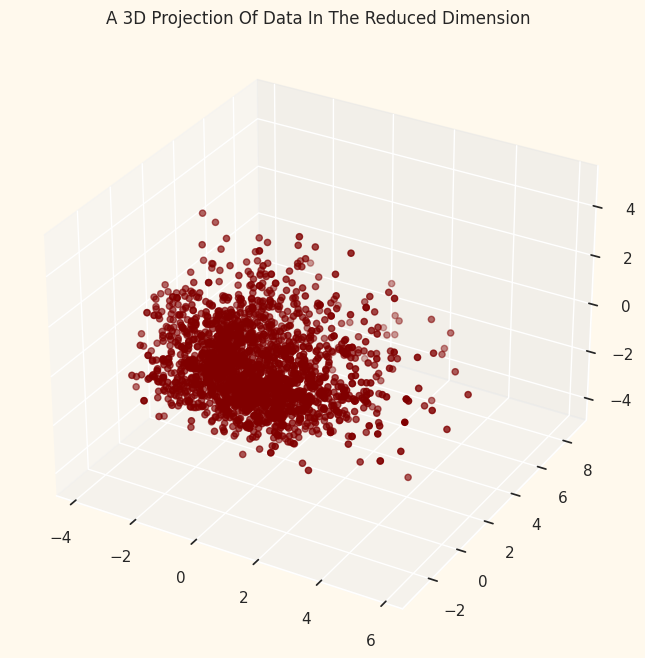

In [57]:
#A 3D Projection Of Data In The Reduced Dimension
w = PCA_ds["col1"]
x =PCA_ds["col2"]
y =PCA_ds["col3"]


#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering

Steps involved in the Clustering

Elbow Method to determine the number of clusters to be formed
Clustering via Agglomerative Clustering
Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


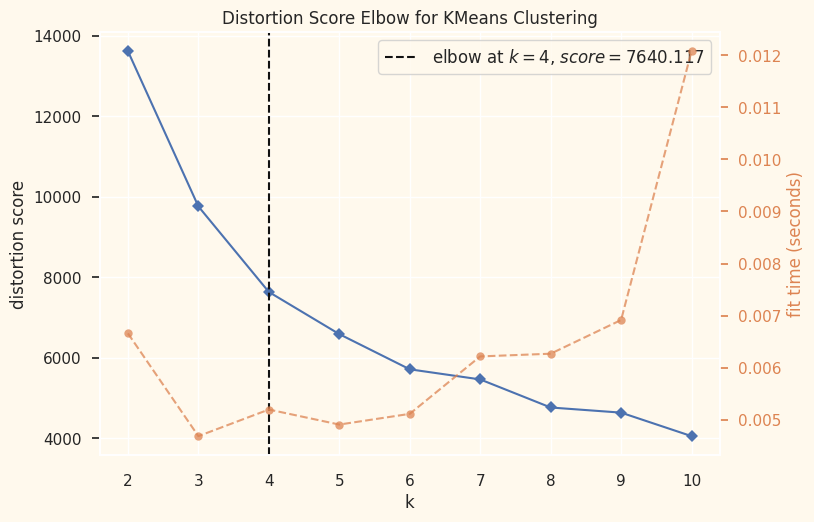

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [59]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

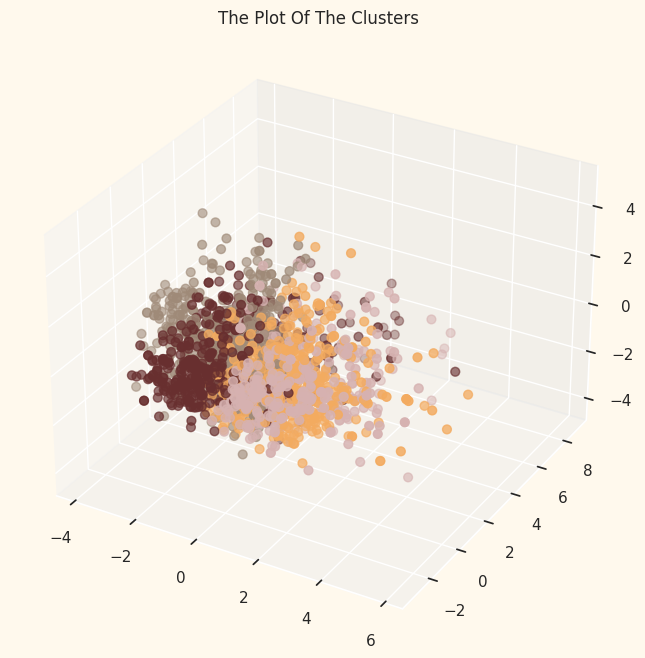

In [60]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()